Rishi Shah rrs141 \\
\
Sneh Shah sjs413

In [2]:
import numpy as np
import scipy as sps
from matplotlib import pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Latex
from numpy import linalg
from scipy import linalg, stats


# Problem 1

In [3]:
def genMaze(dim, p): #this function will generate a dim by dim maze with each square has a chance p of being an obstacle 
  maze = np.zeros((dim,dim)) #creates the maze 
  num = p*10 
  for col in range(len(maze)):
    for row in range(len(maze[0])): #iterating through maze to assign it as obstacle or not 
      rand = np.random.randint(1,10)

      if ((col == 0 and row == 0) or (col == dim-1 and row==dim-1)) : #ignoring the start and goal squares
        continue;


      if (rand<=num): #if random number is equal to 10 * object density
        maze[row][col] = 1 #make block and obstacle 
  return maze



In [4]:
def markPath(maze, path): #function that marks the final successful path (indicated by 4s)
  for i in range(len(path)): #goes through whole path and marks corresponding spots with a 4
    coord = path[i]
    maze[coord[0]][coord[1]] = 4
  
  return maze

# Problem 2


In [5]:
def DFS(start,goal): #DFS algorithm, takes start and goal coords as inputs, returns true if path to goal is possible, false if not possible
 
  fringe = [start] #initalizing fringe and closed set 
  closed = set([])

  movements = [(1,0),(-1,0),(0,1),(0,-1)] #this array represents all the directions you can move in 



  while (len(fringe)>0): #run this loop until fringe no longer has elements in it 
    current = fringe.pop() #for DFS, use a stack
    

    if current in closed:  #if current node is laready in explored set
      continue

   
    if (current[0] == goal[0] and current[1] == goal[1]): #if you have reached the goal node
      return "true"



    for i in range(len(movements)): #find all the valid children by moving in all possible directions 
      distX, distY = movements[i] 
      x = current[0] + distX
      y = current[1] + distY 

      if (x<0 or y < 0 or x >= len(maze) or y >= len(maze) or maze[x][y] == 1 or (x,y) in closed): #checking if child is valid by making sure it isn't outside the maze, an obstacle, or already explored
        #print(x,y)
        continue

          
      fringe.append((x,y)) #append valid child to fringe

      
 
    

    closed.add(current) #add current node to explored 


  return "false" #if you ever go outside the loop (if you're blocked on all sides/can't get to the goal), return false
 


In [6]:
maze = genMaze(100,0.2) 
print(maze)
print(DFS((0,0),(len(maze)-1,len(maze)-1)))

[[0. 0. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
false


[0.94, 0.76, 0.38, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


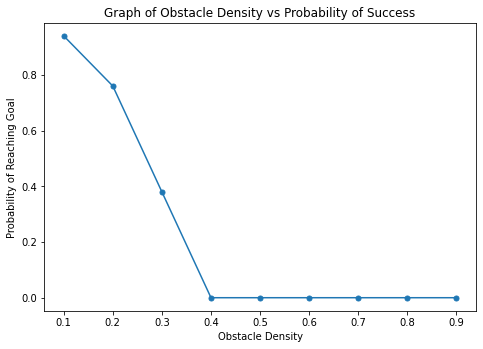

In [7]:
objectDensities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] #list of object densities p 
listResults = [] #initailzing empty list for results

for i in range(len(objectDensities)): #run through all the probabilities 
  count = 0 
  #print(probabilities[i])
  for j in range(50): #each probability 50 different mazes 
    maze = genMaze(500,objectDensities[i]) #generating new maze each time 
    result = DFS((0,0),(len(maze)-1,len(maze)-1)) #run DFS
    if (result == 'true'): #if DFS is success, add 1 to count variable 
      count += 1

  listResults.append(count/50) #find probability of success over the 50 trials
 
print(listResults) 

#making the graph 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]  #x labels 
ax.plot(labels, listResults, marker = ".", markersize=10) 
ax.set_xlabel('Obstacle Density')
ax.set_ylabel('Probability of Reaching Goal')
ax.set_title("Graph of Obstacle Density vs Probability of Success")
fig.show()



# Problem 3

In [8]:
def shortestBFS(start,goal): #BFS method for finding shortest path, takes start and goal coords as inputs, returns shortest path and number of nodes in closed set

  fringe = [start]  #initalizing fringe and closed set 
  closed = set([])

  movements = [(1,0),(-1,0),(0,1),(0,-1)]

  map = [[(0,0) for i in range(len(maze))] for i in range(len(maze))] #this map is used to track each node's parent
  parentFringe = [(-1,-1)] #similar to the regular fringe, this fringe keeps track of current's parent



  while (len(fringe)>0):
    current = fringe.pop(0) #this fringe acts as a queue 
    currentParent = parentFringe.pop(0) #also acts as queue, node that is popped is current's parent
    #print(currentParent)

    if current in closed: #if current is already explored continue
      continue

    map[current[0]][current[1]] = currentParent #updating current node's parent to the previous node current was on (where you moved from)

    if (current[0] ==goal[0] and current[1] == goal[1]): #if you reach goal node break
      break

  


 
    for i in range(len(movements)): #find children by moving in all directions 
      distX, distY = movements[i] #moving through possible neighbors by looking in all directions
      x = current[0] + distX
      y = current[1] + distY 

      if (x<0 or y < 0 or x >= len(maze) or y >= len(maze) or maze[x][y] == 1 or (x,y) in closed): #if out of bounds, obstacle, or already explored, ignore child
        
        continue

      fringe.append((x,y)) #add valid children to fringe 
      parentFringe.append(current) #add valid parents to fringe 



    
    closed.add(current)   #add current to closed 


  path = []
  node = goal
  if (map[node[0]][node[1]]==(0,0)):  #if the parent of the goal node is still (0,0), this means that you cannot find a path to the goal node so return false
    return 0, len(closed) #no shortest path found

  while True:  #this loop creates the array for the official shortest path
    path.append(node)
    node = map[node[0]][node[1]] #this map kept track of the parent's of every node, so you use this to back track along the shortest path back to the start
    #print(node)
    if node[0] == -1:
      break
  
  path = path[::-1] #reverse array 

  return path, len(closed) #return path and number of explored nodes






In [9]:
maze = genMaze(250,0.1)  #generating random maze 
path = shortestBFS((0,0),(len(maze)-1,len(maze)-1)) #running BFS
if (path[0] is not 0): #if path is found, print it and mark the path 
  print(path[0])
  print(markPath(maze,path[0]))
else: #if not found, return path not found
  print("No path found")

[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (13, 1), (13, 2), (14, 2), (15, 2), (16, 2), (17, 2), (17, 3), (18, 3), (19, 3), (20, 3), (21, 3), (22, 3), (23, 3), (24, 3), (25, 3), (26, 3), (27, 3), (27, 4), (28, 4), (29, 4), (30, 4), (31, 4), (31, 5), (32, 5), (33, 5), (34, 5), (35, 5), (36, 5), (37, 5), (38, 5), (39, 5), (40, 5), (41, 5), (42, 5), (43, 5), (43, 6), (44, 6), (45, 6), (46, 6), (47, 6), (48, 6), (49, 6), (50, 6), (51, 6), (52, 6), (53, 6), (54, 6), (54, 7), (55, 7), (56, 7), (57, 7), (58, 7), (59, 7), (60, 7), (61, 7), (62, 7), (62, 8), (62, 9), (63, 9), (64, 9), (65, 9), (66, 9), (67, 9), (68, 9), (69, 9), (70, 9), (71, 9), (72, 9), (73, 9), (74, 9), (75, 9), (76, 9), (76, 10), (77, 10), (78, 10), (79, 10), (80, 10), (81, 10), (81, 11), (82, 11), (83, 11), (84, 11), (85, 11), (86, 11), (87, 11), (88, 11), (89, 11), (89, 12), (90, 12), (91, 12), (92, 12), (93, 12), (94, 12), (94, 13), (95, 13), (96, 

In [59]:
import heapq as pq 

def aStar(start,goal): #a* code that takes start and goal coords as inputs, returns shortest path and length of closed set
  dist =  (np.abs(goal[1]-start[1])**2 + (np.abs(goal[0]-start[0])**2))**(1/2) #euclidian distance 
  fringe = [(dist, 0, dist, start, (-1,-1))]  # cost, node, parent
  pq.heapify(fringe)    #for A*, a heap is used for a fringe, as you want to always travel to the child node with the lowest distance from the goal


  closed = set([]) 

  movements = [(1,0),(-1,0),(0,1),(0,-1)]

  map = [[(0,0) for i in range(len(maze))] for i in range(len(maze))] #this map is to track each node's parent




  while (len(fringe)>0): #loop runs until fringe is empty

    f, g, h, current, parent = pq.heappop(fringe)  #f = total distance, g = number of steps traveled from start, h = euclidian distance from goal, current = node you're on, parent = current's parent node

    if current in closed:
      continue

    map[current[0]][current[1]] = parent  #assigning parent

    if (current[0] ==goal[0] and current[1] == goal[1]): #if you reached goal, break 
      break

  



 
    for i in range(len(movements)):
      distX, distY = movements[i]
      x = current[0] + distX
      y = current[1] + distY 

      if (x<0 or y < 0 or x >= len(maze) or y >= len(maze) or maze[x][y] == 1 or (x,y) in closed):
        continue

          
   

      dist =  (np.abs(goal[1]-y)**2 + (np.abs(goal[0]-x)**2))**(1/2) #calculating heuristic/euclidian distance from goal 
      pq.heappush(fringe, (g+1+dist, g+1, dist, (x,y), current)) #adding child onto heap in correct place 
  
    
    closed.add(current) #add onto closed

  path = []
  node = goal
  if (map[node[0]][node[1]]==(0,0)):  #if the parent of the goal node is still (0,0), this means that you cannot find a path to the goal node so return false
    return 0, len(closed) #no shortest path found

  while True: 
    path.append(node)
    node = map[node[0]][node[1]]  #this map kept track of the parent's of every node, so you use this to back track along the shortest path back to the start
    #print(node)
    if node[0] == -1:
      break
  
  path = path[::-1]
  return path, len(closed)




In [61]:
maze = genMaze(250,0.2)
path = aStar((0,0),(len(maze)-1,len(maze)-1))
if (path[0] is not 0):
  print(path[0])
  print(markPath(maze,path[0]))
else:
  print("No path found")

[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (4, 1), (5, 1), (5, 2), (6, 2), (6, 3), (6, 4), (6, 5), (7, 5), (7, 6), (8, 6), (8, 7), (9, 7), (10, 7), (11, 7), (12, 7), (13, 7), (13, 8), (14, 8), (15, 8), (16, 8), (17, 8), (18, 8), (19, 8), (19, 9), (19, 10), (19, 11), (19, 12), (20, 12), (21, 12), (21, 13), (22, 13), (22, 14), (22, 15), (22, 16), (22, 17), (22, 18), (22, 19), (23, 19), (23, 20), (23, 21), (23, 22), (23, 23), (23, 24), (23, 25), (24, 25), (24, 26), (24, 27), (24, 28), (24, 29), (24, 30), (24, 31), (24, 32), (24, 33), (25, 33), (26, 33), (26, 34), (26, 35), (26, 36), (26, 37), (27, 37), (28, 37), (28, 38), (29, 38), (30, 38), (31, 38), (31, 39), (31, 40), (32, 40), (33, 40), (34, 40), (34, 41), (35, 41), (36, 41), (36, 42), (36, 43), (37, 43), (37, 44), (37, 45), (37, 46), (37, 47), (37, 48), (37, 49), (37, 50), (38, 50), (38, 51), (38, 52), (39, 52), (39, 53), (39, 54), (39, 55), (39, 56), (39, 57), (39, 58), (40, 58), (41, 58), (41, 59), (41, 60), (41, 61), (41, 62), (42, 

[221200.54, 138726.28, 53932.24, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


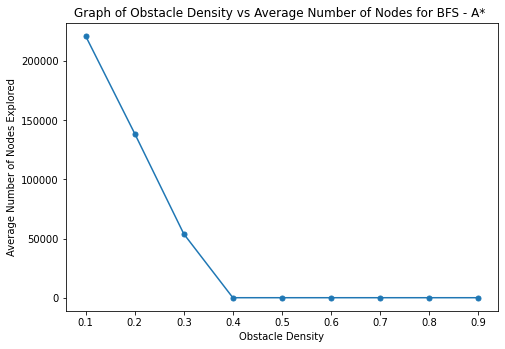

In [12]:
objectDensities = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9] 
listResults = []

for i in range(len(objectDensities)):
  count = 0
  for j in range(50):
    maze = genMaze(500,objectDensities[i])
    result = shortestBFS((0,0),(len(maze)-1,len(maze)-1))[1] - aStar((0,0),(len(maze)-1,len(maze)-1))[1] #taking the difference between the number of nodes BFS explored vs the number of nodes A* explored 
    count += result


  listResults.append(count/50) #taking average of difference 

print(listResults)

#plotting difference graph
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
ax.plot(labels, listResults, marker = ".", markersize=10)
ax.set_xlabel('Obstacle Density')
ax.set_ylabel('Average Number of Nodes Explored')
ax.set_title("Graph of Obstacle Density vs Average Number of Nodes for BFS - A* ")
fig.show()



# Problem 4

In [13]:
import time 

In [34]:
maze = genMaze(4500,0.3) #highest dimension for DFS that resulted in a successful path under a minute 
print(maze)
startTime = time.time() #timing how long it takes to run DFS
print(DFS((0,0),(len(maze)-1,len(maze)-1)))
print(time.time()-startTime)

[[0. 0. 0. ... 1. 0. 1.]
 [1. 1. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
true
54.105403661727905


In [41]:
maze = genMaze(2700,0.3) #highest dimension for BFS that resulted in a successful path under a minute 
startTime2 = time.time()  #timing how long it takes to run BFS
print(shortestBFS((0,0),(len(maze)-1,len(maze)-1)))
print(time.time()-startTime2)

([(0, 0), (1, 0), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 5), (3, 6), (4, 6), (5, 6), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (7, 10), (8, 10), (8, 11), (8, 12), (9, 12), (10, 12), (11, 12), (11, 11), (11, 10), (11, 9), (11, 8), (11, 7), (12, 7), (13, 7), (14, 7), (15, 7), (16, 7), (17, 7), (17, 8), (17, 9), (17, 10), (17, 11), (17, 12), (17, 13), (17, 14), (18, 14), (18, 15), (18, 16), (18, 17), (17, 17), (16, 17), (16, 18), (16, 19), (16, 20), (16, 21), (17, 21), (18, 21), (19, 21), (20, 21), (20, 22), (20, 23), (21, 23), (22, 23), (23, 23), (24, 23), (24, 24), (24, 25), (24, 26), (24, 27), (24, 28), (24, 29), (24, 30), (24, 31), (24, 32), (25, 32), (25, 33), (26, 33), (27, 33), (28, 33), (29, 33), (29, 34), (29, 35), (30, 35), (30, 36), (31, 36), (32, 36), (32, 37), (33, 37), (34, 37), (35, 37), (36, 37), (37, 37), (37, 38), (37, 39), (37, 40), (36, 40), (36, 41), (36, 42), (36, 43), (37, 43), (38, 43), (39, 43), (39, 44), (39, 45), (39, 46), (39, 47), (39, 48), (39, 49

In [16]:
maze = genMaze(3200,0.3) #highest dimension for A* that resulted in a successful path under a minute 
print(maze)
startTime3 = time.time()  #timing how long it takes to run A*
print(aStar((0,0),(len(maze)-1,len(maze)-1)))
print(time.time()-startTime3)

[[0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 1. 1. 0.]]
([(0, 0), (0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 6), (6, 6), (6, 7), (7, 7), (7, 8), (8, 8), (8, 9), (9, 9), (9, 10), (9, 11), (10, 11), (11, 11), (11, 12), (12, 12), (13, 12), (13, 13), (13, 14), (14, 14), (14, 15), (14, 16), (15, 16), (16, 16), (17, 16), (18, 16), (18, 15), (18, 14), (19, 14), (20, 14), (21, 14), (22, 14), (22, 15), (22, 16), (23, 16), (24, 16), (25, 16), (26, 16), (26, 17), (27, 17), (28, 17), (29, 17), (29, 16), (30, 16), (31, 16), (31, 17), (31, 18), (32, 18), (32, 19), (33, 19), (33, 20), (33, 21), (33, 22), (33, 23), (33, 24), (34, 24), (34, 25), (34, 26), (34, 27), (34, 28), (34, 29), (34, 30), (34, 31), (35, 31), (35, 32), (35, 33), (35, 34), (36, 34), (36, 35), (37, 35), (38, 35), (39, 35), (40, 35), (41, 35), (41, 36), (41, 37), (42, 37), (43, 37), (44, 37), (4

# Problem 5

In [17]:
def fireMaze(maze,q): #fire = 2, function that takes in maze and flammability and returns updated maze based upon on neighboring fire count 
  movements = [(1,0),(-1,0),(0,1),(0,-1)]
  fireMaze = maze.copy()
  for row in range(len(maze)): #go through whole maze 
    for col in range(len(maze[0])):
      count = 0
      for i in range(len(movements)): #move in all possible directions
        distX, distY = movements[i]
        x = row + distX
        y = col + distY 
  
        if (x<0 or y < 0 or x >= len(maze) or y >= len(maze) or maze[row][col] == 1): #ignore node if out of bounds or obstacle 
          continue
        if (maze[x][y]==2): #if neighbor is a fire increase fire neighbor count by 1
          count+=1
      
      prob = 1 - (1-q)**count #find probability for current node being a fire 
      if np.random.random() <= prob: #if randomly generated number if lower than the probability, make it on fire
        fireMaze[row][col] = 2

    
  return fireMaze

def initialFire(maze): #takes in maze input and returns maze with initial fire at random coordinate pair
  cond = False 
  while cond == False: #create a random starting fire by finding a random valid coordinate pair
    x = np.random.randint(0,high=len(maze)-1)
    y = np.random.randint(0,high=len(maze)-1)
    if (maze[x][y]==1): #if node is an obstacle, find new coordinate for starting fire
      continue
    maze[x][y]=2 #setting on fire
    cond = True
  return maze, x,y
  


In [62]:

def fireAStar(maze,start,goal): #using a* for strategies 1-2 for fire maze, takes in maze and start and goal coords as inputs, returns shortest path taking into account the fires in the maze
  dist =  (np.abs(goal[1]-start[1])**2 + (np.abs(goal[0]-start[0])**2))**(1/2) #heuristic distance -> euclidian distance
  fringe = [(dist, 0, dist, start, (-1,-1))]  # cost, node, parent
  pq.heapify(fringe)  #making fringe into heap


  closed = set([])

  movements = [(1,0),(-1,0),(0,1),(0,-1)]

  map = [[(0,0) for i in range(len(maze))] for i in range(len(maze))] #setting parents of all nodes to (0,0) -> essentially saying each node doesn't really have a parent yet
  


  
  while (len(fringe)>0): #run until fringe is empty

    f, g, h, current, parent = pq.heappop(fringe) #popping node of fringe with least f distance (f = g+h, where g is the distance from the start and h is the heuristic euclidian distance)

    if current in closed: #if current in closed ignore
      continue

    map[current[0]][current[1]] = parent 

    if (current[0] ==goal[0] and current[1] == goal[1]): #if you reach goal, break 
      break

  

   

 
    for i in range(len(movements)): #check children
      distX, distY = movements[i]
      x = current[0] + distX
      y = current[1] + distY 
 
      if (x<0 or y < 0 or x >= len(maze) or y >= len(maze) or maze[x][y] == 1 or maze[x][y] == 2 or (x,y) in closed): #if out of bounds, obstacle, on fire, or already explored, ignore child
        continue

     

      dist =  (np.abs(goal[1]-y)**2 + (np.abs(goal[0]-x)**2))**(1/2) #calculating child's euclidian distance from goal
      pq.heappush(fringe, (g+1+dist, g+1, dist, (x,y), current)) #adding child onto heap fringe
  
    
    closed.add(current) #adding current node to explored
 
  path = []
  node = goal

  if (map[node[0]][node[1]]==(0,0)):
    return False #no shortest path found

  while True:  #creating the shorest path to return
    path.append(node) 
    node = map[node[0]][node[1]] 

    if node[0] == -1:
      break
  
  path = path[::-1]
  return path



In [63]:
def stratOne(maze,start,goal,q):  #strategy 1 function that takes in input maze, start and goal coordinates, and flammability rate, returns path that agent took
  path = fireAStar(maze,start,goal) #finding path from start to goal
 
  if (path == False):
    return "Path not found" #no path found due to obstacles or fire
  
  
  for i in range(len(path)):  #run through whole path to make sure you don't burn 
    
 

    coord = path[i]
    if (maze[coord[0]][coord[1]] == 2): #if current coordinate is a fire, agent burns
      return "Agent has burned"

    maze = fireMaze(maze, q) #update fire maze based on fire spreading 
  

  return 1, path, maze
    



In [64]:
maze = genMaze(100,0.2)
maze = initialFire(maze)[0]
result = stratOne(maze,(0,0),(len(maze)-1,len(maze)-1), 0.25)

if (result[0] == 1):
  print(result[0])
  print("The shortest path is ", result[1])
  print(markPath(result[2],result[1]))

else:
  print(result)

Agent has burned


In [21]:
def stratTwo(maze,start,goal,q): #strategy 2 function that takes in input maze, start and goal coordinates, and flammability rate, returns path that agent took

  current = start 
  #print(path)
  finalPath = []


  

  while True:
    #print(current)
    #print(maze)
    if (maze[current[0]][current[1]] == 2): #if current node you're on is on fire, agent burns 
      #print(current)
      return "Agent has burned"

    if (current[0]==goal[0] and current[1] == goal[1]): #if you reached goal, success
      finalPath.append(current) #appending goal node
      return 1, finalPath, maze

    path = fireAStar(maze,current,goal) #finding path from current node to goal, run on every step
    #print(path)

    if (path == False): #if no path found, return false
      return "Path not found"

    finalPath.append(current) 
    current = path[1] #move to next step

    maze = fireMaze(maze, q) #generate new maze based on fire spreading
  








In [65]:
maze = genMaze(100,0.2)
maze = initialFire(maze)[0]
result = stratTwo(maze,(0,0),(len(maze)-1,len(maze)-1), 0.15)

if (result[0] == 1):
  print(result[0])
  print("The shortest path is ", result[1])
  print(markPath(result[2],result[1]))

else:
  print(result)

1
The shortest path is  [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (2, 20), (2, 21), (3, 21), (3, 22), (3, 23), (4, 23), (4, 24), (5, 24), (5, 25), (5, 26), (5, 27), (5, 28), (6, 28), (7, 28), (7, 29), (7, 30), (7, 31), (7, 32), (7, 33), (7, 34), (8, 34), (8, 35), (8, 36), (8, 37), (8, 38), (9, 38), (9, 39), (9, 40), (9, 41), (9, 42), (9, 43), (9, 44), (9, 45), (9, 46), (9, 47), (10, 47), (10, 48), (10, 49), (11, 49), (11, 50), (11, 51), (12, 51), (12, 52), (12, 53), (12, 54), (12, 55), (13, 55), (14, 55), (14, 56), (14, 57), (14, 58), (14, 59), (14, 60), (14, 61), (14, 62), (14, 63), (14, 64), (14, 65), (14, 66), (14, 67), (14, 68), (14, 69), (15, 69), (16, 69), (16, 70), (17, 70), (18, 70), (19, 70), (20, 70), (21, 70), (22, 70), (23, 70), (24, 70), (25, 70), (26, 70), (26, 71), (26, 72), (26, 73), (27, 73), (28, 73), (28, 74

In [56]:
def countFireAStar(maze,start,goal): #using a* for strategy 3 for fire maze, takes in input maze and start and goal coordinates, returns shortest path from start input to goal by avoiding paths that have more neighboring fires
  dist =  (np.abs(goal[1]-start[1])**2 + (np.abs(goal[0]-start[0])**2))**(1/2) #euclidian distance
  fringe = [(dist, 0, dist, start, (-1,-1))]  # cost, node, parent
  pq.heapify(fringe)  


  closed = set([])

  movements = [(1,0),(-1,0),(0,1),(0,-1)]

  map = [[(0,0) for i in range(len(maze))] for i in range(len(maze))]




  while (len(fringe)>0):

    f, g, h, current, parent = pq.heappop(fringe) #getting next shortest distance from fringe 

    if current in closed:
      continue

    map[current[0]][current[1]] = parent #assigning parent

    if (current[0] ==goal[0] and current[1] == goal[1]): #if reached goal
      break

  


 
    for i in range(len(movements)): #checking children
      distX, distY = movements[i]
      x = current[0] + distX
      y = current[1] + distY 

      if (x<0 or y < 0 or x >= len(maze) or y >= len(maze) or maze[x][y] == 1 or maze[x][y] == 2 or (x,y) in closed): #if out of bounds, obstacle, on fire, or already explored, ignore
        #print(x,y)
        continue

      count = 0 #reset count for each neighbor of the child
      for j in range(len(movements)): #checking child's neighbors and counting how many are on fire 
        distA, distB = movements[j]
        a = x+distA
        b = y+distB
        
        if (a<0 or b < 0 or a >= len(maze) or b >= len(maze) or maze[a][b] == 1):
          continue 

        if (maze[a][b]==2): #if neighbor is on fire, increment count 
          count+=1
          
      
   

     

      dist =  (np.abs(goal[1]-y)**2 + (np.abs(goal[0]-x)**2))**(1/2) #calculating euclidian distance 
      pq.heappush(fringe, (g+1+dist+count, g+1, dist+count, (x,y), current)) #similar to a* heappush except we also add in number of neighboring fires
  
    
    closed.add(current)

  path = []
  node = goal

  if (map[node[0]][node[1]]==(0,0)):
    return False #no shortest path found

  while True:  #getting actual shortest path
    path.append(node)
    node = map[node[0]][node[1]]
    #print(node)
    if node[0] == -1:
      break
  
  path = path[::-1]
  return path



In [52]:
def stratThree(maze,start,goal,q): #strategy 3 function that takes input maze, start and goal coordinates, and flammability rate, returns the path from start to goal that the agent took 
#we can call this CNN (Check Neighbors' Neighbors) as it uses this principle of checking the fires surrounding the neighbor to evaluate optimality of paths
  movements = [(1,0),(-1,0),(0,1),(0,-1)]
  current = start
  #print(path)
  finalPath = []


  
  j = 0
  path = countFireAStar(maze,current,goal) #find path from start to goal, accounts for future states of fire, as it plans around already existing fires, as those areas are likekly to have more fire in the future
  #print(path)
  if (path == False): #if no path possible return path not found
    return "path not found"

  while True:
    #print(current)
    #print(maze)
    if (maze[current[0]][current[1]] == 2): #if current node is on fire, agent burns 
      #print(current)
      return "Agent has burned"

    if (current[0]==goal[0] and current[1] == goal[1]): #if reach goal, success 
      finalPath.append(current) #appending goal node
      return 1, finalPath, maze
   
    if (maze[goal[0]][goal[1]]==2):
      return "Goal on fire" #if goal is on fire, you can't reach goal

    j += 1
    nextNode = path[j]
    cond = False
    for i in range(len(movements)): #checking next node in the path to see if it's neighbors on fire, this also accounts for future states as the next node you're going to is an immediate potential risk of having a fire
      if (maze[nextNode[0]][nextNode[1]]==2): 
        cond = True
        break 

      distX, distY = movements[i]
      x = nextNode[0] + distX
      y = nextNode[1] + distY 

      if (x<0 or y < 0 or x >= len(maze) or y >= len(maze)): #checking if out of bounds
        continue 

      if (maze[x][y]==2): #if neighbor is a fire 
        cond = True #set condition = true and break of loop 
        break

    finalPath.append(current) 
    if cond == True:  #if next node's neighbors are on fire, then rerun a*, as this path is likely become risky now 
      path = countFireAStar(maze,current,goal) 

      if path == False:
        return "path not found"

      current = path[1]
      j = 1
   
    else: #if next node not on fire, advance on same path
      current = nextNode
      
    
  
    maze = fireMaze(maze, q) #update fire maze
  








In [55]:
maze = genMaze(100,0.2)
maze = initialFire(maze)[0]
result = stratThree(maze,(0,0),(len(maze)-1,len(maze)-1), 0.2)
if (result[0] == 1):
  print(result[0])
  print("The shortest path is ", result[1])
  print(markPath(result[2],result[1]))

else:
  print(result)

1
The shortest path is  [(0, 0), (0, 1), (1, 1), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (4, 4), (4, 5), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (6, 9), (7, 9), (7, 10), (7, 11), (8, 11), (8, 12), (9, 12), (10, 12), (11, 12), (11, 13), (12, 13), (13, 13), (14, 13), (15, 13), (15, 14), (16, 14), (17, 14), (17, 15), (17, 16), (18, 16), (19, 16), (19, 15), (20, 15), (21, 15), (22, 15), (22, 16), (22, 17), (22, 18), (22, 19), (23, 19), (23, 20), (23, 21), (23, 22), (23, 23), (23, 24), (23, 25), (23, 26), (22, 26), (22, 27), (22, 28), (21, 28), (21, 29), (21, 30), (22, 30), (23, 30), (24, 30), (25, 30), (26, 30), (27, 30), (28, 30), (29, 30), (30, 30), (31, 30), (32, 30), (32, 31), (32, 32), (32, 33), (32, 34), (31, 34), (31, 35), (31, 36), (32, 36), (32, 37), (33, 37), (34, 37), (35, 37), (36, 37), (37, 37), (38, 37), (39, 37), (39, 38), (39, 39), (39, 40), (40, 40), (40, 41), (41, 41), (41, 42), (42, 42), (42, 43), (43, 43), (43, 44), (43, 45), (44, 45), (44, 46), (45, 46), (46, 46), (46,

# Problem 6

[1.0, 0.64, 0.6, 0.72, 0.48, 0.4, 0.28, 0.28, 0.28, 0.08, 0.16, 0.04, 0.0, 0.04, 0.0, 0.0, 0.08, 0.0, 0.0, 0.0, 0.0]


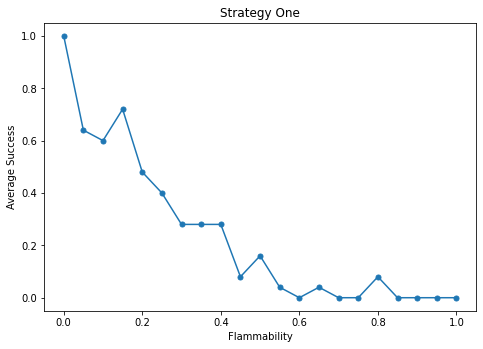

In [ ]:
flammability = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
listResults = []

for i in range(len(flammability)): #running through all possible flammabilties
  count = 0
  trueCount = 0 #var for counting number of successes 
  while count < 25: #run 25x for each flammability
  #print(probabilities[i])
    maze = genMaze(50,0.3)
    maze, x, y = initialFire(maze)
    #print(count)
    if DFS((0,0), (x,y)) == "true" and DFS((0,0),(len(maze)-1,len(maze)-1)) == "true": #if fire is reachable from the start (not blocked by obstacles) and if the goal is reachable from the start
      count+=1
      result = stratOne(maze,(0,0),(len(maze)-1,len(maze)-1), flammability[i]) #run strategy one 
      if result[0] == 1: #if result was a success 
        trueCount+=1
  listResults.append(trueCount/25) #take average 

print(listResults)
#plotting graph 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#labels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
ax.plot(flammability, listResults, marker = ".", markersize=10)
ax.set_xlabel('Flammability')
ax.set_ylabel('Average Success')
ax.set_title("Strategy One")
fig.show()



[1.0, 0.92, 0.76, 0.4, 0.64, 0.44, 0.4, 0.32, 0.16, 0.2, 0.0, 0.04, 0.04, 0.04, 0.08, 0.04, 0.0, 0.0, 0.0, 0.0, 0.0]


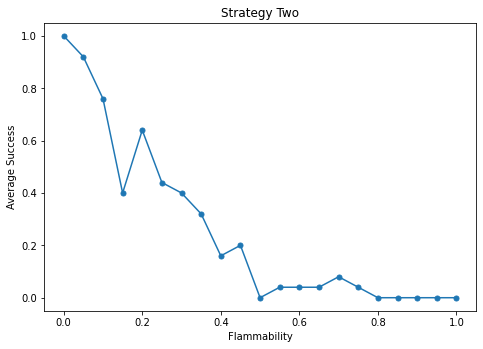

In [ ]:
flammability = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
listResults = []

for i in range(len(flammability)):
  count = 0
  trueCount = 0
  while count < 25:
  #print(probabilities[i])
    maze = genMaze(50,0.3)
    maze, x, y = initialFire(maze)
    if DFS((0,0), (x,y)) == "true" and DFS((0,0),(len(maze)-1,len(maze)-1)) == "true": #if fire is reachable from the start (not blocked by obstacles) and if the goal is reachable from the start
      count+=1
      result = stratTwo(maze,(0,0),(len(maze)-1,len(maze)-1), flammability[i])
      if result[0] == 1:
        trueCount+=1
  listResults.append(trueCount/25)

print(listResults)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(flammability, listResults, marker = ".", markersize=10)
ax.set_xlabel('Flammability')
ax.set_ylabel('Average Success')
ax.set_title("Strategy Two")
fig.show()

[1.0, 0.96, 0.88, 0.68, 0.64, 0.44, 0.28, 0.32, 0.12, 0.12, 0.2, 0.04, 0.0, 0.0, 0.12, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


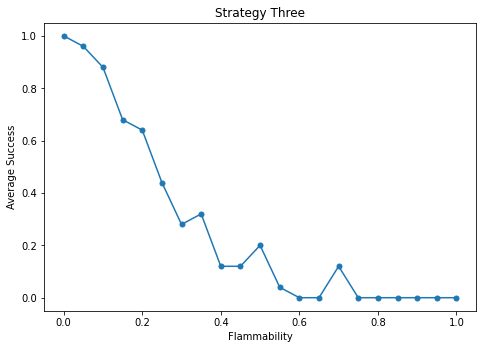

In [59]:
flammability = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
listResults = []

for i in range(len(flammability)):
  count = 0
  trueCount = 0
  while count < 25:
  #print(probabilities[i])
    maze = genMaze(50,0.3)
    maze, x, y = initialFire(maze)
    if DFS((0,0), (x,y)) == "true" and DFS((0,0),(len(maze)-1,len(maze)-1)) == "true": #if fire is reachable from the start (not blocked by obstacles) and if the goal is reachable from the start
      count+=1
      result = stratThree(maze,(0,0),(len(maze)-1,len(maze)-1), flammability[i])
      if result[0] == 1:
        trueCount+=1
  listResults.append(trueCount/25)

print(listResults)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(flammability, listResults, marker = ".", markersize=10)
ax.set_xlabel('Flammability')
ax.set_ylabel('Average Success')
ax.set_title("Strategy Three")
fig.show()

## Citations

“Graph Plotting in Python: Set 1.” GeeksforGeeks, 14 Feb. 2018, www.geeksforgeeks.org/graph-plotting-in-python-set-1/ \\ 

Real Python. “The Python Heapq Module: Using Heaps and Priority Queues.” Real Python, Real Python, 12 Feb. 2021, realpython.com/python-heapq-module/#basic-operations.  \\ 

Sanatan, Marcus. “Stacks and Queues in Python.” Stack Abuse, Stack Abuse, stackabuse.com/stacks-and-queues-in-python/. 